In [76]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import copy
%matplotlib inline

In [55]:
data = pd.read_csv('16.csv', header=None)

In [56]:
data.head(10)

,0,1,2,3,4
0,2.406640,1.0,2.569265,1.134234,0.009986
1,3.579147,1.0,1.817105,1.008626,0.009992
2,2.076401,1.0,9.596029,4.560576,0.009950
3,2.801457,1.0,7.617839,3.754187,0.009961
4,4.049240,1.0,7.622255,4.005385,0.009964
5,5.330127,1.0,5.145334,3.119443,0.009980
6,29.179641,1.0,5.182616,9.126426,0.010039
7,2.558586,1.0,6.678984,3.211991,0.009965
8,29.993368,1.0,5.908428,9.667707,0.010038
9,17.700366,1.0,4.041164,5.650604,0.010016


In [57]:
X = np.matrix(data[data.columns[1:]])
y = np.array(data[0])

In [58]:
A = X.T.dot(X)

In [59]:
np.linalg.det(A)

0.67743594580835187

In [60]:
A

matrix([[  1.00000000e+03,   4.82421831e+03,   5.05060680e+03,
           1.00022625e+01],
        [  4.82421831e+03,   3.16333309e+04,   2.42002354e+04,
           4.81678489e+01],
        [  5.05060680e+03,   2.42002354e+04,   3.38033637e+04,
           5.06021006e+01],
        [  1.00022625e+01,   4.81678489e+01,   5.06021006e+01,
           1.00046953e-01]])

In [61]:
A.I.dot(X.T).dot(y)

matrix([[  5.82970442e+01,  -2.05354548e+00,   4.05503771e+00,
          -5.52048495e+03]])

Последний коэффициент слишком большой. Можно сказать что модель переобучилась. Вызвано это тем, что в данных есть линейные зависимости, т.к. det(A) достаточно мал. Чтобы бороться с этим можно использовать регуляризацию, что и предлагается.

In [75]:
C = np.linspace(0, 100, 1000)

sigma = []
for c in C:
    coefs = []
    for i in range(len(X)):
        tmp = copy.deepcopy(X[i])
        X[i] = np.array([0, 0, 0, 0])
        coefs.append((X.T.dot(X) + c * np.eye(4)).I.dot(X.T).dot(y))
        X[i] = copy.deepcopy(tmp)
        
    sigma.append(np.var(np.array(coefs), axis=0))

In [88]:
sigma = np.array(sigma)

(0, 1e-06)

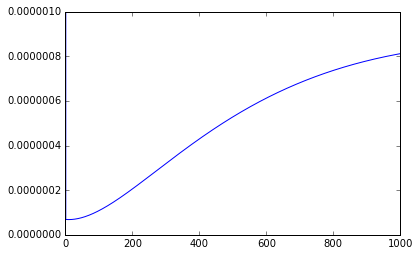

In [98]:
plt.plot(range(len(X)), sigma[:,0,0])
plt.ylim(0, 0.000001)

(0, 2e-08)

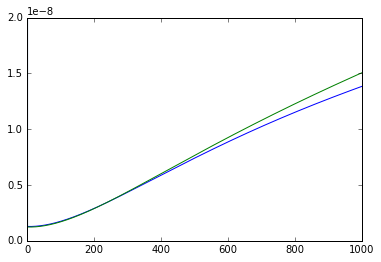

In [102]:
plt.plot(range(len(X)), sigma[:,0,1])
plt.plot(range(len(X)), sigma[:,0,2])
plt.ylim(0, 0.00000002)

(0, 1e-10)

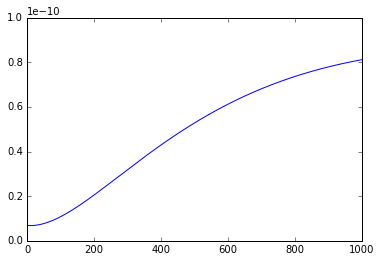

In [105]:
plt.plot(range(len(X)), sigma[:,0,3])
plt.ylim(0, 0.0000000001)

In [110]:
C[np.argmin(sigma[:,0,0])]

1.0010010010010011

Оптимальное значение лямбда - 1

In [112]:
(X.T.dot(X) + 1 * np.eye(4)).I.dot(X.T).dot(y)

matrix([[ 3.07231503, -1.99635673,  4.00121442,  0.03078305]])

In [114]:
np.min(sigma[:,0,0])

6.8178958310763734e-08

In [130]:
min_bound = []
max_bound = []
for c in C:
    coefs = []
    for i in range(len(X)):
        tmp = copy.deepcopy(X[i])
        X[i] = np.array([0, 0, 0, 0])
        coefs.append((X.T.dot(X) + c * np.eye(4)).I.dot(X.T).dot(y))
        X[i] = copy.deepcopy(tmp)
        
    min_bound.append(np.min(np.array(coefs), axis=0))
    max_bound.append(np.max(np.array(coefs), axis=0))

In [133]:
min_bound = np.array(min_bound)
max_bound = np.array(max_bound)

(0, 5)

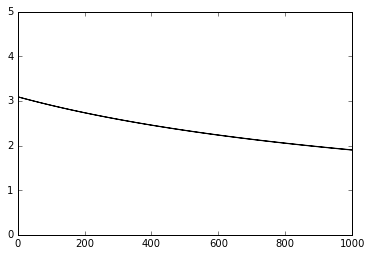

In [155]:
plt.fill_between(range(1000), min_bound[:,0,0], max_bound[:,0,0])
plt.ylim(0, 5)

(-2.1, -1.8)

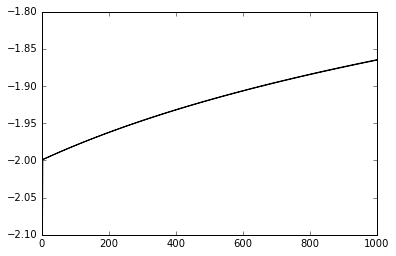

In [164]:
plt.fill_between(range(1000), min_bound[:,0,1], max_bound[:,0,1])
plt.ylim(-2.1, -1.8)

(3.9, 4.1)

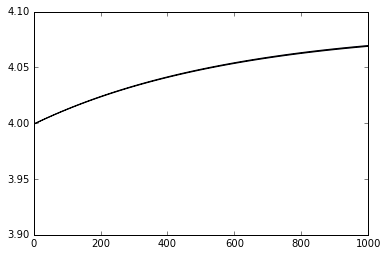

In [160]:
plt.fill_between(range(1000), min_bound[:,0,2], max_bound[:,0,2])
plt.ylim(3.9, 4.1)

(0, 0.05)

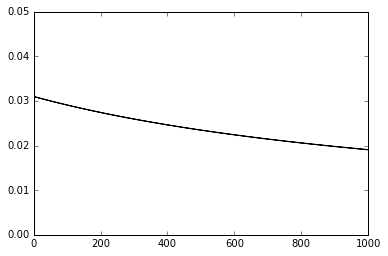

In [158]:
plt.fill_between(range(1000), min_bound[:,0,3], max_bound[:,0,3])
plt.ylim(0, 0.05)

Похоже что первый столбец кореллирует с последним, а второй с третьим